<a href="https://colab.research.google.com/github/asmaa1596/pandas_and_google_colab/blob/master/clustering_data_for_decision_making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# this dictionary contains the name of the categury and the relevant gsheet url, so any new data can be added here
# NOTE: name the data sheet as  "data"

dbs={
'name' : gc.open_by_url('URL'),

}

dfs={}
#this goes to all urls and get the data of "data" sheet 
for cat_name,gsheet_url in dbs.items():
  dfs[cat_name]=pd.DataFrame(gsheet_url.worksheet('data').get_all_values())

print("we are ready to go")


we are ready to go


In [0]:
required_heads=['Lat','Long','Name']

for name,df in dfs.items():

  # adjusting the headers
  df.columns = df.iloc[0]
  df = df.iloc[1:]

  # checking if the req heads are in place
  if False in [i in list(df.columns) for i in required_heads]:
    print('data of {} has required headers'.format(name))
    print( list(df.columns))
    continue

required_heads+=['Type']
big_df=pd.concat(list(dfs.values()),sort=False)[required_heads]
big_df=big_df.iloc[1:]  
big_df


In [0]:
big_df['Lat'] = pd.to_numeric(big_df['Lat'],errors='coerce')
big_df['Long'] = pd.to_numeric(big_df['Long'],errors='coerce')

types=list(set(list(big_df.Type)))
big_df[big_df.Type==types[5]]
#plot the data based on a small area
study_df=big_df[(big_df.Lat>3)&(big_df.Lat<3.1)&(big_df.Long>101)&(big_df.Long<101.5)]
#del(big_df)
#del(dfs)

#print(study_df.head())

# study_df.plot.scatter(x='Long',y='Lat',c='DarkBlue',figsize=(30,20))


In [0]:
print(study_df)

In [0]:
study_df.to_csv(r'study_d.csv', index = False)

In [0]:
new_study_df2 = study_df.drop(['Type'], axis = 1)
new_study_df = new_study_df2.drop(['Name'], axis = 1)


In [0]:
new_study_df

In [0]:
study_df = pd.melt(study_df, "Type", var_name="Long")

In [0]:
sns.swarmplot(x="Long", y= "Lat", hue="Type",
              palette=["r", "c", "y"], data=study_df)

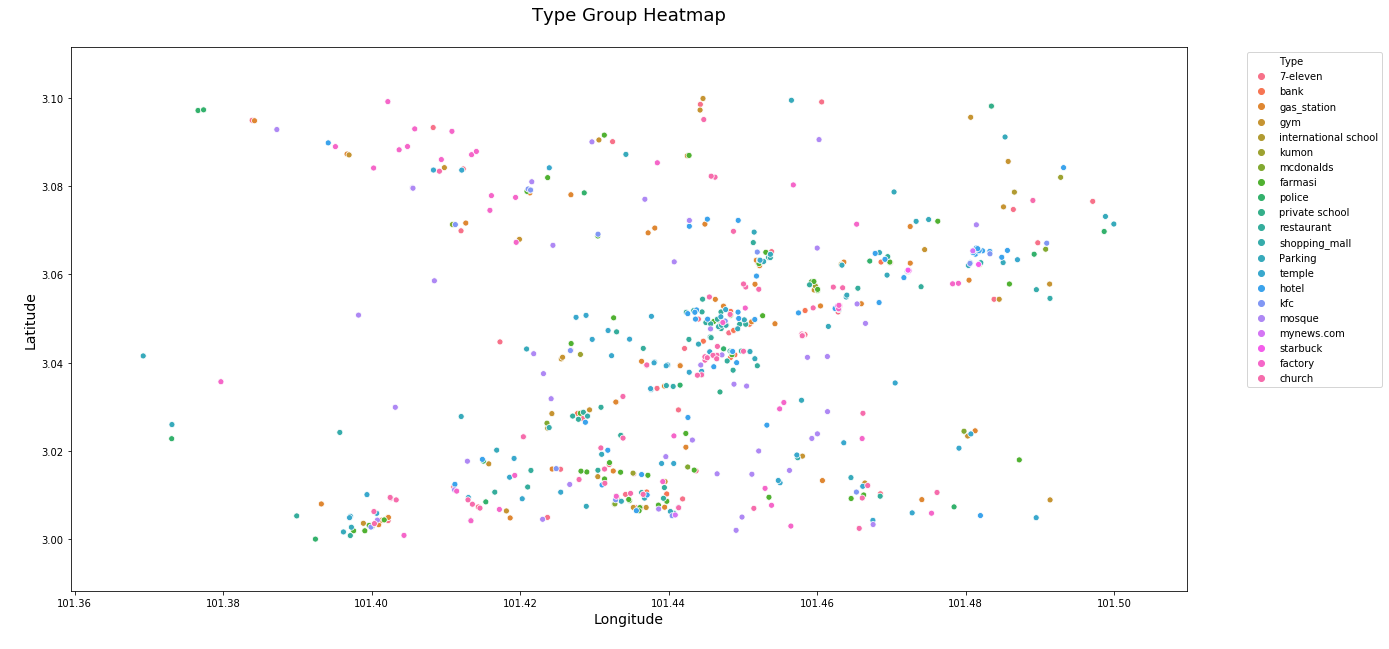

In [0]:


plt.figure(figsize=(20,10))
sns.scatterplot(x=new_study_df['Long'],
               y=new_study_df['Lat'],
                hue=study_df['Type'],
                alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Type Group Heatmap\n', fontsize=18)
plt.xlabel('Longitude\n', fontsize=14)
plt.ylabel('\nLatitude', fontsize=14)
plt.show()

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,   scale, StandardScaler

In [0]:
X_std = StandardScaler().fit_transform(new_study_df)

In [0]:
km = KMeans(n_clusters=2, max_iter=100)
km.fit(new_study_df)
print(km.labels_)
centroids = km.cluster_centers_

[1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1
 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1
 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 

In [0]:
new_study_df

,Lat,Long
379,3.094900,101.383915
382,3.004532,101.401904
383,3.004193,101.402222
385,3.093260,101.408292
386,3.011828,101.411063
...,...,...
1384,3.010371,101.434866
1552,3.095075,101.444728
1553,3.082238,101.445726
1556,3.037141,101.443871


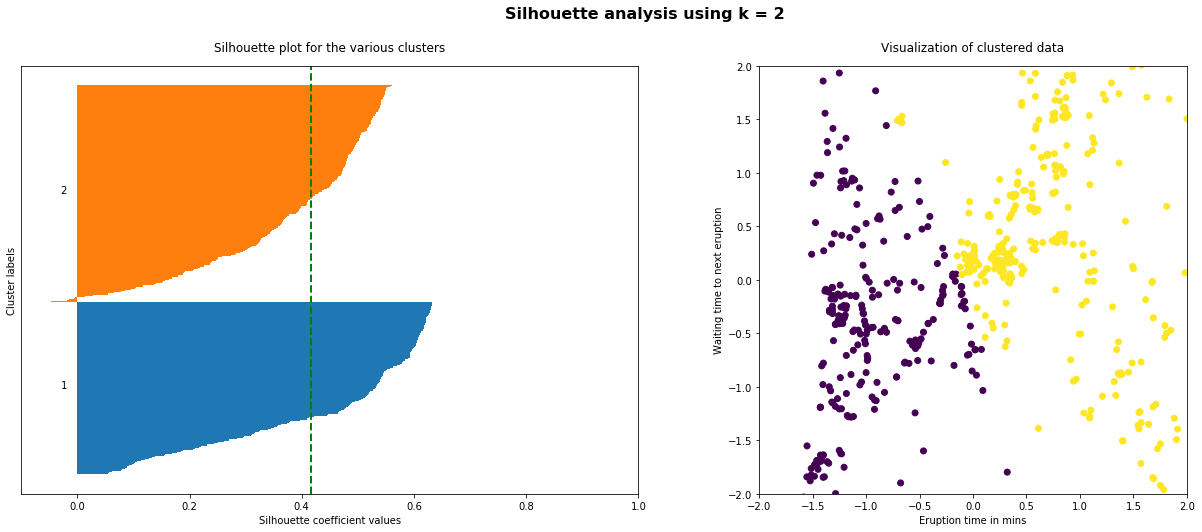

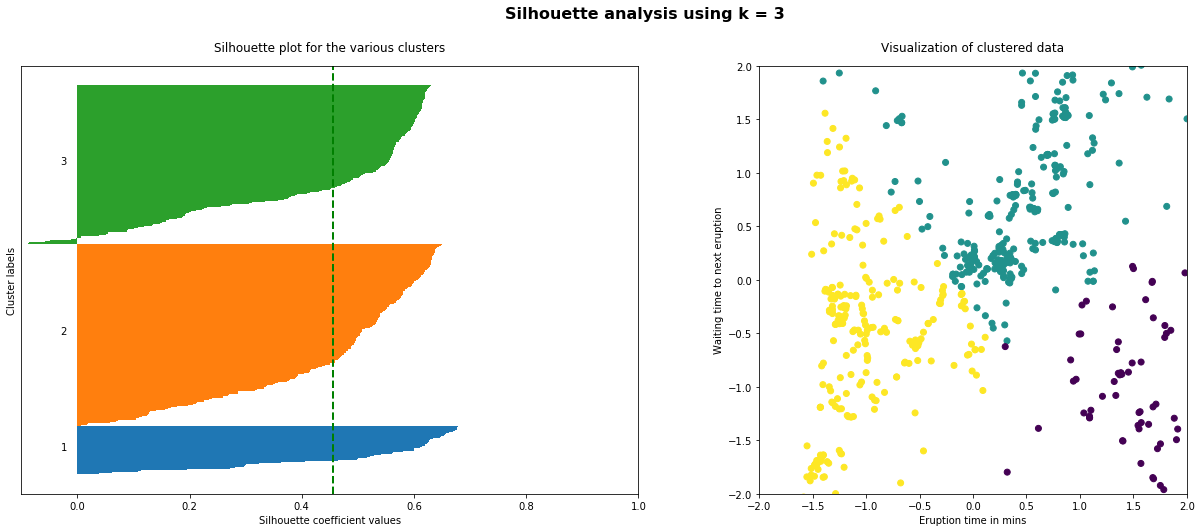

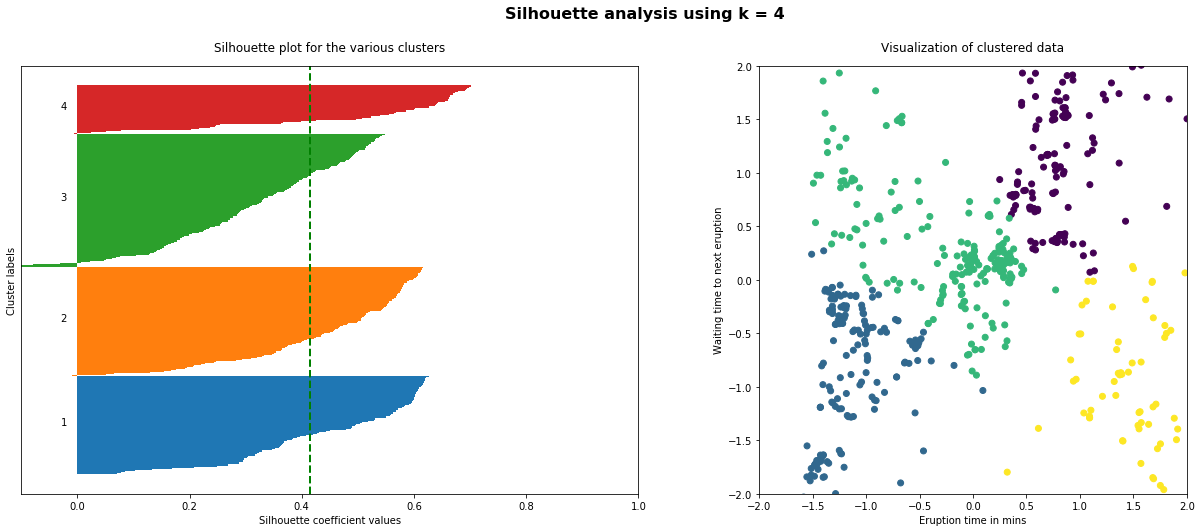

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(new_study_df)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(new_study_df, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_ylim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

adding random numbers between 1 to 10 into the cells of column Sorting RUN ONCE ONLY - DONE





In [0]:
#@title HIDDEN CODE
import random
for cat_name,gsheet_url in dbs.items():
  sheet = gsheet_url.worksheet('data')
  cell_list = sheet.range('I2:I6000')
  for cell in cell_list:
    cell.value = random.randint(1,10)
  sheet.update_cells(cell_list)  
